In [5]:
import numpy as np,pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [4]:
pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------------------------------- - 1.3/1.4 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
df=pd.read_csv("Market_Basket_Optimisation - Market_Basket_Optimisation.csv")
tr=[]
for i in range(0,len(df)):
    tr.append([str(df.values[i,j]) for j in range(0,df.shape[1]) if str(df.values[i,j])!='nan'])

In [9]:
from mlxtend.preprocessing import TransactionEncoder 
te=TransactionEncoder()

In [10]:
tr_array=te.fit(tr).transform(tr)
df_encoded=pd.DataFrame(tr_array,columns=te.columns_)

In [11]:
freq_itemsets=apriori(df_encoded,min_support=0.01,use_colnames=True)
print(freq_itemsets.shape[0])

284


In [14]:
rules=association_rules(freq_itemsets,metric='confidence',min_threshold=0.1)
rules=rules[rules['antecedents'].apply(lambda x: len(x) >=1) & rules['consequents'].apply(lambda x: len(x)>=1)]
print(rules.shape[0])

449


In [16]:
rules[['antecedents','consequents','support','confidence','lift']].head(5)

,antecedents,consequents,support,confidence,lift
0,(almonds),(eggs),0.011084,0.409091,1.866190
1,(almonds),(mineral water),0.013547,0.500000,1.915094
2,(milk),(avocado),0.013547,0.105769,3.303254
3,(avocado),(milk),0.013547,0.423077,3.303254
4,(avocado),(mineral water),0.014778,0.461538,1.767779


In [17]:
ai=[ i for e in tr for i in e]
ti=pd.Series(ai).value_counts().head(10)

<Axes: title={'center': 'top 10 most purchases '}>

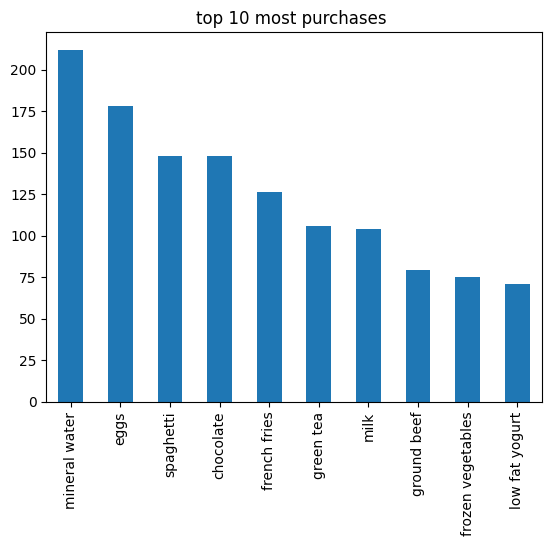

In [18]:
ti.plot(kind='bar',title='top 10 most purchases ')